# MODULES


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets

sns.set()


# FROM SAMPLE TO POPULATION

## Sampling Distribution of Sample Statistics

The true value of a population's parameter is usually unknown; we try to estimate it based on the available sample data. But how does the sample statistics relate to the actual population parameter ?

As covered ealier:
+ the true value of a population's parameter is fixed.
+ a sample is only part of the population; the numerical value of its statistic will not be the exact value of the parameter.
+ the observed value of the statistic depends on the selected sample.
+ some variability in the values of a statistic, over different samples, is unavoidable.

As it depends on the sample, the sample statistic is random and has a **sampling distribution** we can study. 


## Central Limit Theorem

Let ${X_{1},\ldots ,X_{n}}$ be a sequence of independent and identically distributed (i.i.d.) random variables drawn from a distribution of expected value $\mu$ and finite variance $\sigma^2$. Let ${\bar {X}}_{n}$ be the sample average: ${\bar {X}}_{n} = ({X_{1} + \ldots + X_{n}}) / n$.

### Law of Large Numbers (LLN)

The [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) states that the sample mean converges to $\mu$ as the sample size increases.


### Central Limit Theorem (CLT)

The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that during this convergence, the difference between the sample mean and its limit $\mu$ approximates the normal distribution with mean 0 and variance $\sigma ^{2}/n$. A very important property of the CLT is that it holds regardless of the distribution of $X_i$.

In other words: for large samples (typically $n$ greater than 30), the sampling distribution of the sample mean is approximately normal and has the following paramters:

>+ mean: $\mu$
>+ standard error: $\sigma / \sqrt{n}$

The **standard error** is the **standard deviation** of the **sampling distribution** of the sample mean.





_Note: the variance calculated from a sample of size $n$ uses $n-1$ to average the distances from the mean, in what is called the [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction), to [reduce the bias](https://dawenl.github.io/files/mle_biased.pdf)._



In [22]:
# lambda
lb = 5
expn = stats.expon(scale=lb)
norm = stats.norm(lb, lb)

# samples
means = np.zeros(100)
means

for i in range(1):
    sample = expn.rvs(size=1000)
    means[i] = sample.mean()


5.136303927339248


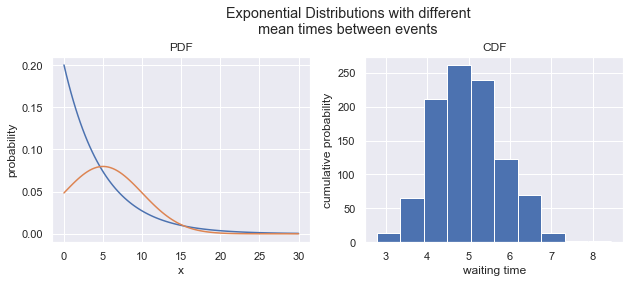

In [26]:
# lambda
lb = 5
expn = stats.expon(scale=lb)
norm = stats.norm(lb, lb)

# samples
means = np.zeros(1000)
for i in range(1000):
    sample = expn.rvs(size=40)
    means[i] = sample.mean()

# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))
x = np.linspace(0, 30, 101)

# pdf
ax1.plot(x, expn.pdf(x))
ax1.plot(x, stats.norm.pdf(x, lb, lb))

# dist of sample means
ax2.hist(means)


# labels
_ = ax1.set_xlabel('x')
_ = ax1.set_ylabel('probability')
_ = ax2.set_xlabel('waiting time')
_ = ax2.set_ylabel('cumulative probability')

# titles
_ = ax1.set_title('PDF')
_ = ax2.set_title('CDF')

fig.suptitle('Exponential Distributions with different\nmean times between events')

plt.tight_layout(rect=[0, 0, 0.9, 0.9])


#### Law of Large Numbers

The [**Law of Large Numbers**](https://en.wikipedia.org/wiki/Law_of_large_numbers) states that:

> The **mean and standard variation of a sample** get **closer to their expected value** as **the sample size increases**.

<br>
The example below shows the sampling distribution of 1000 samples of 40 exponential values ([exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) of mean=5 and sd=25). The mean of both distributions is close to the value they estimate.

![samping dist.png](https://sebastienplat.s3.amazonaws.com/1481d044baf7373620d967594e8509b31490003412437)


#### Central Limit Theorem

The [**Central Limit Theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem) states that, according to the Law of Large Numbers:

> For large samples (n ≥ 30), the **sampling distribution of the sample mean** $\bar{y}$ is approximately **normal**, **regardless of the original distribution**:

>+ mean $\mu$
>+ standard error $\sigma / \sqrt{n}$

The **standard error** is the **standard deviation** of the **sampling distribution** of the sample mean.

<br>
The example below shows:

+ the PDF of the exponential distribution (mean=5 and sd=25), compared to the normal distribution of same mean and sd
+ the empirical distribution of samples mean VS the one predicted by the CLT

The exponential distribution is not even close to being normal, but the empirical distribution is very close to being normal, as predicted by the CLT.

![clt.png](https://sebastienplat.s3.amazonaws.com/e26192439d8acfe388ec2b7f3f61ebd91490003678751)


#### Confidence Interval

We usually have only **one sample** to study a population, and we do not know **how close** its mean is from the actual population mean.

We estimate the population mean by using the **sample mean** plus or minus a **margin of error**. The result is called a **confidence interval** for the population mean.

A [**Confidence Interval**](https://en.wikipedia.org/wiki/Confidence_interval) is expressed with a confidence percentage $1 - \alpha$. It means that for $1 - \alpha$ of all samples of size $n$ that could be drawn from the population, the Confidence Interval will include $\mu$.

It means that there is an $\alpha$ probability that our sample mean is so far from the actual mean that its Confidence Interval does not include $\mu$.

<br>
The 95% Confidence Interval is the most commonly used. As the sampling distribution of the sample mean is roughly normal, our sample mean $\bar{y}$ has a 95% probability of being between -2 and +2 standard errors of $\mu$:

$P(\bar{y} \in [\space\mu \pm 2 se\space] ) = P(\bar{y} \in [\space\mu \pm 2 \sigma/\sqrt{n}\space] ) \simeq 0.95$ 

<img class="center-block" src="https://sebastienplat.s3.amazonaws.com/9ec352c1ff3263bdd17c8407d30c1f0b1490007929308"/>

We can deduce that:

$P(\mu \in [\space\bar{y} \pm 2 \sigma/\sqrt{n}\space] ) \simeq 0.95$


___

# T-Distribution

The CLT Confidence intervals **does not works** when:

+ **$\sigma$ is unknown**
+ the sample size **$n$ is small**

The [Student’s t distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) is used instead. 

Its tails are **thicker than normal**, so its Confidence Interval is **wider** for the same Confidence Level. This is because **estimating the population standard deviation** introduces more **uncertainty**.

The **sampling distribution** of the sample mean has to be roughly **normal** for the t-distribution to work well. It means that either:

+ the sample size **$n$ is large**, OR
+ the **population** is roughly **normal** (very small samples)

If the sample size is very small, we can use normal probability plots to check whether the sample may come from a normal distribution.

It the t-distribution cannot be used, it is possible to use a more robust procedure such as the one-sample [**Wilcoxon procedure**](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test).


<br>
Back to the Exponential Distribution, Fig.6 shows the experimental sample mean distribution vs T vs Normal for different sample sizes: 2, 5, 10 and 20. The t-distribution gets close to normal even for relatively small sample sizes. But it does not approximate the empirical distribution very well for smaller sample sizes.

<img class="center-block" src="https://sebastienplat.s3.amazonaws.com/dc954f3e9562d53b7829a2adcd2854ff1490011103173"/>

<br>
The $1 - \alpha$ T Confidence Interval is:

> $\bar{y} \pm T_{\alpha/2, n-1} \times SD_{Est} / \sqrt{n}$

> where $T_{\alpha/2, n-1}$ is the distance from the mean of the t-distribution with n-1 degrees of freedom above which lay $\alpha/2$ percent of all observations

The Confidence Interval is narrower (ie. more precise) when:

+ the confidence level is low
+ the sample size is large
+ the standard deviation of the population is small



#### Sample size

In a normal distribution, 95% of the data is between --2 and +2 standard deviations from the mean. Even for skewed data, going two standard deviations away from the mean often captures nearly all of the data.

If we know the minimum and maximum values that the population is likely to take (excluding outliers), we can suppose they represent this interval of four standard deviations.

It means the standard deviation of a population $\sigma$ can be approximated by:

$\sigma \simeq 1/4 \times \Delta_{range}$

If we know the margin of error $E$ we are ready to accept at $1 - \alpha$ confidence, the sample size we need can be approximated by:

$n \simeq [Z_{\alpha/2} \times \sigma / E]^2 \simeq [Z_{\alpha/2} \times  \Delta_{range} / 4 E]^2 $

A more accurate method to estimate the sample size: iteratively evaluate the following formula, until the $n$ value chosen to calculate the t-value matches the resulting $n$.

$n \simeq [t_{\alpha/2, n-1} \times  \Delta_{range} / 4 E]^2 $